Fraud Transactions:
            Time        V1        V2        V3        V4        V5        V6  \
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7   

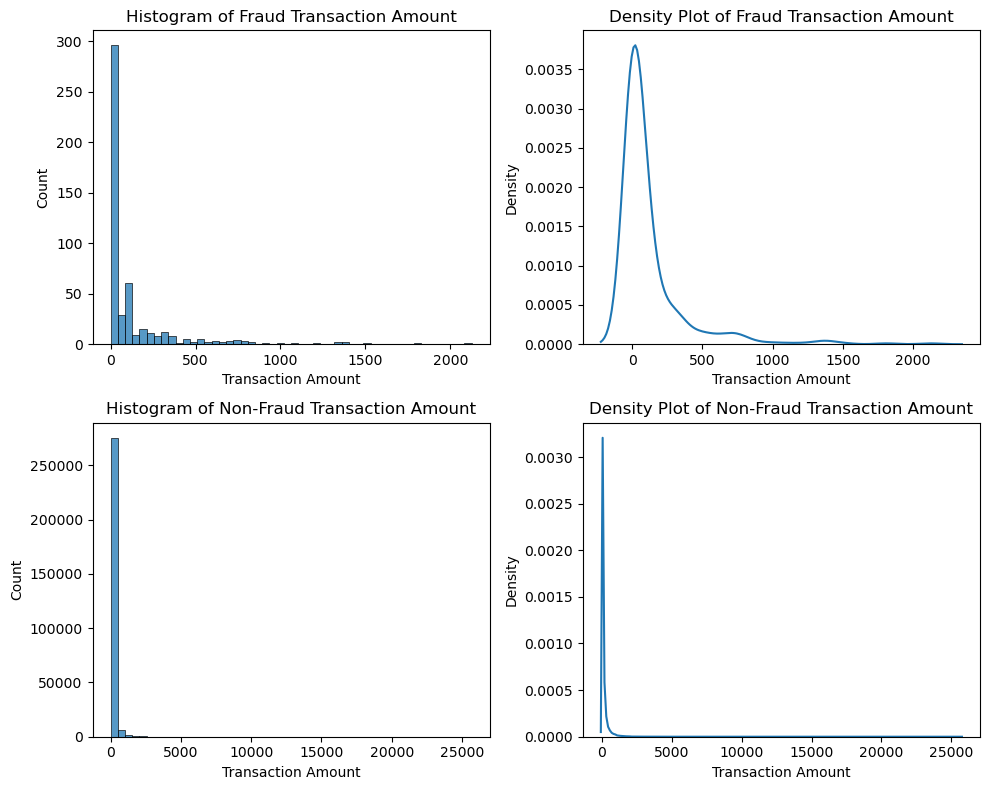

In [1]:
#separate the fraud and non-fraud transactions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# # FEATURE SELECT
df = df[['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class','Amount']]


# FRAUD AND NON FRAUD TRNASECTION
fraud_transactions = df[df['Class'] == 1]
non_fraud_transactions = df[df['Class'] == 0]


print("Fraud Transactions:")
print(fraud_transactions)


print("\nNon-Fraud Transactions:")
print(non_fraud_transactions)



# BUILD SUBPLOT FOR HISTOGRAM AND DENSITY PLOT

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()


sns.histplot(fraud_transactions['Amount'], bins=50, ax=axs[0])
sns.kdeplot(fraud_transactions['Amount'], ax=axs[1])


sns.histplot(non_fraud_transactions['Amount'], bins=50, ax=axs[2])
sns.kdeplot(non_fraud_transactions['Amount'], ax=axs[3])


axs[0].set_title("Histogram of Fraud Transaction Amount")
axs[1].set_title("Density Plot of Fraud Transaction Amount")
axs[2].set_title("Histogram of Non-Fraud Transaction Amount")
axs[3].set_title("Density Plot of Non-Fraud Transaction Amount")
axs[0].set_xlabel("Transaction Amount")
axs[1].set_xlabel("Transaction Amount")
axs[2].set_xlabel("Transaction Amount")
axs[3].set_xlabel("Transaction Amount")
axs[0].set_ylabel("Count")
axs[1].set_ylabel("Density")
axs[2].set_ylabel("Count")
axs[3].set_ylabel("Density")


plt.tight_layout()
plt.show()

In [3]:
# PREPROCESS STEP

import pandas as pd
import numpy as np



#DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# DROP COLUMN
df.drop('Time', axis=1, inplace=True)

# DROP MISSING VALUE
df.dropna(inplace=True)

# ONE-HOT ENCODING 
df = pd.get_dummies(df, columns=['Class'], drop_first=True)


# NORMALIZE THE AMOUNT COLUMN USING Z-SCORE NORMALIZATION
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# DIVIDE FRAUD AND NON FRAUD TRANSECTION
fraud_transactions = df[df['Class_1'] == 1]
non_fraud_transactions = df[df['Class_1'] == 0]


print("Fraud Transactions:")
print(fraud_transactions)


print("\nNon-Fraud Transactions:")
print(non_fraud_transactions)




Fraud Transactions:
              V1        V2        V3        V4        V5        V6        V7  \
541    -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623    -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920   -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108   -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329    1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8   

Confusion Matrix:
[[83148  2001]
 [ 6845 78595]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85149
           1       0.98      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



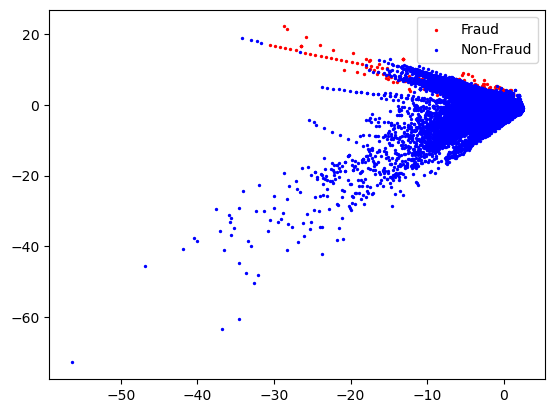

In [10]:

#USING RANDOM OVERSAMPLING  AND TRAIN LOGISTIC REGRESSION CLASSES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# DROP UNNEED COLUMN
df.drop('Time', axis=1, inplace=True)

# HANDLE MISSING VALUE
df.dropna(inplace=True)

# ONE-HOT ENCODING
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# NORMALIZE THE AMOUNT COLUMN USING Z-SCORE NORMALIZATION
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# SPLIT DATA
X = df.drop('Class_1', axis=1)
y = df['Class_1']

# PERFORM RANDOM OVERSAMPLING TO HANDLE IMBALANCED CLASSES
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# SPLIT RESAMPLED DATA
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# TRAIN LOGISTIC MODEL
model = LogisticRegression()
model.fit(X_train, y_train)

# PREDICTION
y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred)))


# DEVIDE FRAUD AND NON FRAUD
fraud_transactions = df[df['Class_1'] == 1]
non_fraud_transactions = df[df['Class_1'] == 0]

#VISUALIZE FRAUD AND NON FRAUD
plt.scatter(fraud_transactions['V1'], fraud_transactions['V2'], color='red', s=2, label='Fraud')
plt.scatter(non_fraud_transactions['V1'], non_fraud_transactions['V2'], color='blue', s=2, label='Non-Fraud')
plt.legend()
plt.show()


Confusion Matrix:
[[85282    25]
 [   26   110]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.81      0.81       136

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



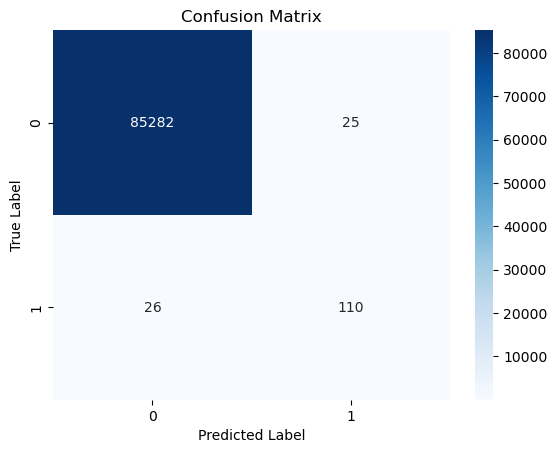

In [11]:
# using MLPClassifier algorithm ...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# DATASET
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# DROP UNNEED COLUMN
df.drop('Time', axis=1, inplace=True)

# HANDLE MISSING VALUES
df.dropna(inplace=True)

# ONE-HOT ENCODING
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# NORMALIZE THE AMOUNT COLUMN USING Z-SCORE NORMALIZATION
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# SPLIT DATA
X = df.drop('Class_1', axis=1)
y = df['Class_1']


# PERFORM RANDOM OVERSAMPLING TO HANDLE IMBALANCED CLASSES
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#TRAIN NURAL NETWORK  MODEL
model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# PREDICTION
y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()